In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load rating dataset
rating_df = pd.read_csv("../dataset/rating_dataset.csv")
rating_df.head()

,userId,ISBN,bookRating,bookTitle,user,books
0,276747,60517794,4.5,Little Altars Everywhere,0,966
1,278843,60517794,3.5,Little Altars Everywhere,1,966
2,4017,60517794,5.0,Little Altars Everywhere,2,966
3,8961,60517794,4.0,Little Altars Everywhere,3,966
4,21788,60517794,4.5,Little Altars Everywhere,4,966


In [3]:
# Load book dataset 
book_df = pd.read_csv("../dataset/book_dataset.csv")
book_df.head()

,bookTitle,bookRating,ISBN,bookAuthor,yearOfPublication,Publisher,url,bookImage,bookDesc,ratingCount,bookPages,bookGenres,bookGenre1,bookGenre2,bookGenre3,books
0,To Kill a Mockingbird,4.28,446310786,Harper Lee,1988,Little Brown &amp,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,The unforgettable novel of a childhood in a sl...,4772918,324 pages,"['Classics', 'Fiction', 'Historical-Historical...",Classics,Fiction,Historical-HistoricalFiction,0
1,Pride and Prejudice,4.27,055321215X,Jane Austen,1983,Bantam,https://www.goodreads.com/book/show/44623850-p...,https://i.gr-assets.com/images/S/compressed.ph...,an alternate cover edition can be found hereIn...,3206208,446 pages,"['Classics', 'Fiction', 'Romance', 'Historical...",Classics,Fiction,Romance,1
2,Animal Farm,3.96,451526341,George Orwell,2004,Signet,https://www.goodreads.com/book/show/14060211-a...,https://i.gr-assets.com/images/S/compressed.ph...,This remarkable book has been described in man...,2927053,95 pages,"['Classics', 'Fiction', 'ScienceFiction-Dystop...",Classics,Fiction,ScienceFiction-Dystopia,2
3,Gone with the Wind,4.30,446365386,Margaret Mitchell,1993,Warner Books,https://www.goodreads.com/book/show/18405.Gone...,https://i.gr-assets.com/images/S/compressed.ph...,"Scarlett O'Hara, the beautiful, spoiled daught...",1106466,1037 pages,"['Classics', 'Historical-HistoricalFiction', '...",Classics,Historical-HistoricalFiction,Fiction,3
4,The Giving Tree,4.37,60256664,Shel Silverstein,1964,HarperCollins,https://www.goodreads.com/book/show/370493.The...,https://i.gr-assets.com/images/S/compressed.ph...,"""Once there was a tree...and she loved a littl...",952487,64 pages,"['Childrens', 'Childrens-PictureBooks', 'Class...",Childrens,Childrens-PictureBooks,Classics,4


In [4]:
"""Data cleaning dataset rating"""

# Menghilangkan data duplikat pada userId dan mengubahnya menjadi list 
user_ids = rating_df['userId'].unique().tolist()
 
# Melakukan encoding data pada userId
user_to_userEncoded = {x: i for i, x in enumerate(user_ids)}
print("user_to_userencoded :\t", user_to_userEncoded)

# Melakukan encoding angka ke userId
userEncoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("userEncoded_to_user :\t", userEncoded_to_user)

user_to_userencoded :	 {276747: 0, 278843: 1, 4017: 2, 8961: 3, 21788: 4, 26883: 5, 34987: 6, 37227: 7, 52584: 8, 86548: 9, 88123: 10, 96357: 11, 110382: 12, 135149: 13, 147528: 14, 158583: 15, 163467: 16, 164323: 17, 164956: 18, 201697: 19, 202277: 20, 208287: 21, 224220: 22, 231838: 23, 237776: 24, 246634: 25, 249228: 26, 249746: 27, 6073: 28, 11676: 29, 13947: 30, 30511: 31, 62464: 32, 84537: 33, 92853: 34, 121596: 35, 139462: 36, 142479: 37, 159854: 38, 182676: 39, 186848: 40, 208570: 41, 221655: 42, 225986: 43, 226950: 44, 226965: 45, 234288: 46, 276755: 47, 99: 48, 5268: 49, 9652: 50, 11629: 51, 16634: 52, 16782: 53, 21404: 54, 22625: 55, 28204: 56, 33179: 57, 34222: 58, 38281: 59, 48025: 60, 55075: 61, 59712: 62, 66591: 63, 67515: 64, 68156: 65, 74208: 66, 78783: 67, 79942: 68, 81394: 69, 82102: 70, 86145: 71, 87141: 72, 93179: 73, 94985: 74, 95921: 75, 96634: 76, 103377: 77, 106225: 78, 114089: 79, 114216: 80, 114988: 81, 120082: 82, 120350: 83, 125878: 84, 126296: 85, 132303: 

In [5]:
"""Data cleaning dataset book"""

# Menghilangkan data duplikat pada ISBN dan mengubahnya menjadi list 
books_ids = book_df['ISBN'].unique().tolist()
 
# Melakukan encoding data pada ISBN
book_to_bookEncoded = {x: i for i, x in enumerate(books_ids)}
print("book_to_bookEncoded :\t", book_to_bookEncoded)

# Melakukan encoding angka ke ISBN
bookEncoded_to_book = {i: x for i, x in enumerate(books_ids)}
print("bookEncoded_to_book :\t", bookEncoded_to_book)

book_to_bookEncoded :	 {'446310786': 0, '055321215X': 1, '451526341': 2, '446365386': 3, '60256664': 4, '385504209': 5, '375400117': 6, '671461494': 7, '671027344': 8, '812589041': 9, '185326041X': 10, '340568879': 11, '193156146X': 12, '142000671': 13, '60809833': 14, '1590071875': 15, '316769487': 16, '812505018': 17, '440998050': 18, '3257208626': 19, '316168815': 20, '60254920': 21, '151008116': 22, '440900794': 23, '449212602': 24, '451166892': 25, '451143426': 26, '553278355': 27, '671617028': 28, '345316413X': 29, '425080021': 30, '60175400': 31, '451524934': 32, '081615970X': 33, '446605239': 34, '689839618': 35, '345361792': 36, '345337662': 37, '1559276452': 38, '142001740': 39, '8433970100': 40, '671704664': 41, '743424425': 42, '140042598': 43, '553256653': 44, '399208534': 45, '1402555989': 46, '451167716': 47, '786868716': 48, '451149955': 49, '805062971': 50, '067168390X': 51, '039480001X': 52, '380789035': 53, '446608955': 54, '380018179': 55, '394800796': 56, '96540456

In [6]:
# Mendapatkan jumlah user
num_users = len(user_to_userEncoded)
print("Jumlah user :\t", num_users)
 
# Mendapatkan jumlah buku
num_book = len(book_to_bookEncoded)
print("Jumlah buku :\t", num_book)
 
# Nilai minimum dan maksimum rating
min_rating = min(rating_df['bookRating'])
max_rating = max(rating_df['bookRating'])
 
print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

Jumlah user :	 11536
Jumlah buku :	 1536
Number of User: 11536, Number of Books: 1536, Min Rating: 0.5, Max Rating: 5.0


In [7]:
# Melakukan pengacakan dataset rating
df = rating_df.sample(frac=1, random_state=42)
df

,userId,ISBN,bookRating,bookTitle,user,books
12618,247887,031205436X,2.5,Generation X: Tales for an Accelerated Culture,7921,629
14848,26084,440222656,2.5,The Horse Whisperer,675,250
7739,178914,743211383,2.5,Dreamcatcher,5490,451
1807,194606,452282152,4.5,Girl with a Pearl Earring,1655,75
20354,242781,067179938X,4.5,Son of the Morning,11051,1438
...,...,...,...,...,...,...
11964,193572,553268880,4.0,The Prince of Tides,7620,98
21575,112001,380769840,5.0,Ashes in the Wind,1045,1057
5390,174757,385324057,4.0,Summer Sisters,4159,717
860,123544,886773741,5.0,Tailchaser's Song,832,1107


In [8]:
# Membuat data user dan data books menjadi satu value dalam variabel x
x = df[['user', 'books']].values
 
# Melakukan normalisasi data min max dan disimpan dalam variabel y
y = df['bookRating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi data menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [9]:
"""Membuat model machine learning"""

class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( 
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-3)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-3)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    book_vector = self.book_embedding(inputs[:, 1]) 
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) 

In [10]:
# Inisialisasi model yang telah dibuat
model = RecommenderNet(num_users, num_book, 50) 

# Melakukan compile model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(1e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [11]:
# Memulai training 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 10,
    validation_data = (x_val, y_val)
)


Epoch 1/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.7157 - root_mean_squared_error: 0.3201 - val_loss: 0.6572 - val_root_mean_squared_error: 0.2767
Epoch 2/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6339 - root_mean_squared_error: 0.2403 - val_loss: 0.6299 - val_root_mean_squared_error: 0.2208
Epoch 3/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6082 - root_mean_squared_error: 0.2064 - val_loss: 0.6211 - val_root_mean_squared_error: 0.2204
Epoch 4/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5990 - root_mean_squared_error: 0.2026 - val_loss: 0.6132 - val_root_mean_squared_error: 0.2165
Epoch 5/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5906 - root_mean_squared_error: 0.1970 - val_loss: 0.6044 - val_root_mean_squared_error: 0.2171
Epoch 6/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5801 - root_mean_squared_error: 0.1943 - val_loss: 0.5960 - val_root_mean_squared_error: 0.2148
Epoch 7/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step 

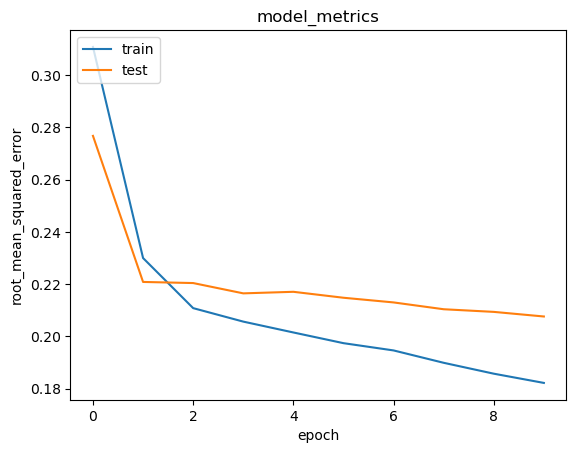

In [12]:
# Melakukan visuaslisasi hasil training
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Mengambil data user yang sudah diencode (pada dataset kolom user) secara acak
user_encoder = rating_df.user.sample(1).iloc[0]

# Menentukan buku yang sudah dibaca user
books_have_been_read_by_user = rating_df[rating_df.user == user_encoder]
 
# Menentukan buku yang belum dibaca user
books_have_not_been_read_by_user = book_df[~book_df['books'].isin(books_have_been_read_by_user['books'].values)]['books'] 

# Mengambil data ISBN yang sudah diencode (pada dataset kolom book)
ISBN_encoder = book_df.books.iloc[0:]

# Membuat list data ISBN yang telah diencode pada buku yang dibelum dibaca user
book_list = [[ISBN_encoder.get(x)] for x in books_have_not_been_read_by_user ]

# Membuat array user book
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_list), book_list)
)
user_book_array

array([[1614,    0],
       [1614,    1],
       [1614,    2],
       ...,
       [1614, 1533],
       [1614, 1534],
       [1614, 1535]])

In [14]:
ratings = model.predict(user_book_array).flatten()

# Menentukan top rating buku
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Mengambil data ISBN 
ISBN = book_df.ISBN.iloc[0:]

# Menentukan rekomendasi buku untuk user
recommended_book_ids  = [ISBN.get(book_list[x][0]) for x in top_ratings_indices]
 
# Menentukan top buku yang sudah dibaca user
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'bookRating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

# Menentukan buku yang sudah dibaca user
books_row = book_df[book_df['ISBN'].isin(top_books_recommended)]

# Menampilkan buku yang sudah dibaca user
for row in books_row.itertuples():
    print(row.bookTitle, ':', row.bookAuthor, ':', row.bookGenres)
 
print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_encoder))
print('----' * 8)

# Menentukan buku yang direkomendasikan untuk user
recommended_books = book_df[book_df['ISBN'].isin(recommended_book_ids)]

# Menampilkan buku yang direkomendasikan untuk user
for row in recommended_books.itertuples():
    print(row.bookTitle, ':', row.bookAuthor, ':', row.bookGenres)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The Poisonwood Bible : Barbara Kingsolver : ['Fiction', 'Historical-HistoricalFiction', 'Cultural-Africa', 'Classics', 'Historical', 'LiteraryFiction', 'Novels', 'Literature', 'Religion', 'AdultFiction']
Girl with a Pearl Earring : Tracy Chevalier : ['Historical-HistoricalFiction', 'Fiction', 'Historical', 'Classics', 'Art', 'Romance', 'AdultFiction', 'Adult', 'Novels', 'Literature']
--------------------------------
Top 10 Book Recommendation for user: 1614
--------------------------------
To Kill a Mockingbird : Harper Lee : ['Classics', 'Fiction', 'Historical-HistoricalFiction', 'Academic-School', 'Literature', 'YoungAdult', 'Historical', 'Novels', 'Academic-ReadForSchool', 'YoungAdult-HighSchool']
The Da Vinci Code : Dan Brown : ['Fiction', 'Mystery', 'Thriller', 'Suspense', 'Thriller-MysteryThriller', 'Historical-HistoricalFiction', 'Adventure', 'Novels', 'Mystery-Crime', 'Adult']
The Handmaid's Tale : Margaret Atwood : ['Fiction', 'Classics',

In [15]:
# Membuat file model ML
import pickle
with open('model', 'wb') as f:
  pickle.dump(model, f)